## This notebook is plotting the distribution of fiducial differential cross sections for different models and 2 scenrios:

### 1) The response matrix is the one coming from the BDT prediction 

### 2) The response matrix is the one coming from the SM MC test sample

The differential x-sec are computed with respect to recoPt and recoNjets2p5.
For that the profiles around the best fit fid diff cross sections are computed in the same way as in the notebook "EffectOfDifferentResponses" but this time the profiles are plotted together in a histogram.

#### Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import plotting as pl
import chi2_stats as chistat 
import scipy.optimize as opt
import os
from scipy.stats import chi2
from scipy.stats import norm

import LikelihoodProfile as lp
reload(lp)

import plotting as pl

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

Welcome to ROOTaaS 6.06/05


For each model, i.e. each production mechanism ggF, VBF, VH and ttH a profile Likelihood instance is instancinated.
This is the same way how it is done in the notebook "EffectOfDifferentResponses" but this time the profiles are plotted together in a histogram.

#### For each model one profile with the BDT predicted response and one with the SM response matrix is computed. The kinematic observable is recoPt

In [2]:
path = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/differential_recoMatrices/'


labels = ['','std',
        'ggF_CUETP8M1_up',
        'ggF_CUETP8M1_down',
        'ggF_PS_up',
        'ggF_PS_down',
        'ggF_Powheg',
        'VBF_CUETP8M1_up',
        'VBF_CUETP8M1_down',
        'VBF_PS_up',
        'VBF_PS_down',
        'VBF_Powheg',              
]

classifier_names = ['3clfs_std']

observable = 'recoPt'


ggF_pred = []
ttH_pred = []
VBF_pred = []
VH_pred = []
SM_pred =[]
BSM1_pred =[]
BSM2_pred =[]
BSM3_pred =[]
"""
VBF_CUETP8M1Down_pred = []
VBF_CUETP8M1Up_pred = []
VBF_DownPS_pred = []
VBF_UpPS_pred = []
VBF_powheg_pred = []
ggF_CUETP8M1Down_pred = []
ggF_CUETP8M1Up_pred = []
ggF_DownPS_pred = []
ggF_UpPS_pred = []
ggF_powheg_pred = []
"""

ggF_SM = []
ttH_SM = []
VBF_SM = []
VH_SM = []
SM_SM =[]
BSM1_SM =[]
BSM2_SM =[]
BSM3_SM =[]
"""
VBF_CUETP8M1Down_true = []
VBF_CUETP8M1Up_true = []
VBF_DownPS_true = []
VBF_UpPS_true = []
VBF_powheg_true = []
ggF_CUETP8M1Down_true = []
ggF_CUETP8M1Up_true = []
ggF_DownPS_true = []
ggF_UpPS_true = []
ggF_powheg_true = []
"""

for classifier_name in  classifier_names :
    
    ggF_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    ttH_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ttH',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ttH_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ttH',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VBF_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VH_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VH',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VH_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VH',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    SM_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='SM',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    SM_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='SM',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    BSM1_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM1',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    BSM1_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM1',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    BSM2_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM2',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    BSM2_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM2',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    BSM3_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM3',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    BSM3_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM3',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    """
    VBF_CUETP8M1Down_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_CUETP8M1Down',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_CUETP8M1Down_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_CUETP8M1Down',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VBF_CUETP8M1Up_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_CUETP8M1up',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_CUETP8M1Up_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_CUETP8M1up',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VBF_DownPS_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_DownPS',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_DownPS_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_DownPS',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VBF_UpPS_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_UpPS',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_UpPS_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_UpPS',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VBF_powheg_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_powheg',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_powheg_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF_powheg',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
  


    ggF_CUETP8M1Down_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_CUETP8M1Down',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_CUETP8M1Down_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_CUETP8M1Down',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    ggF_CUETP8M1Up_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_CUETP8M1up',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_CUETP8M1Up_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_CUETP8M1up',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    ggF_DownPS_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_DownPS',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_DownPS_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_DownPS',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    ggF_UpPS_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_UpPS',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_UpPS_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_UpPS',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    ggF_powheg_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_powheg',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_powheg_true.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF_powheg',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    """

### Plot the fid x-sec spectra as a function of recoPt

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_ggF.png


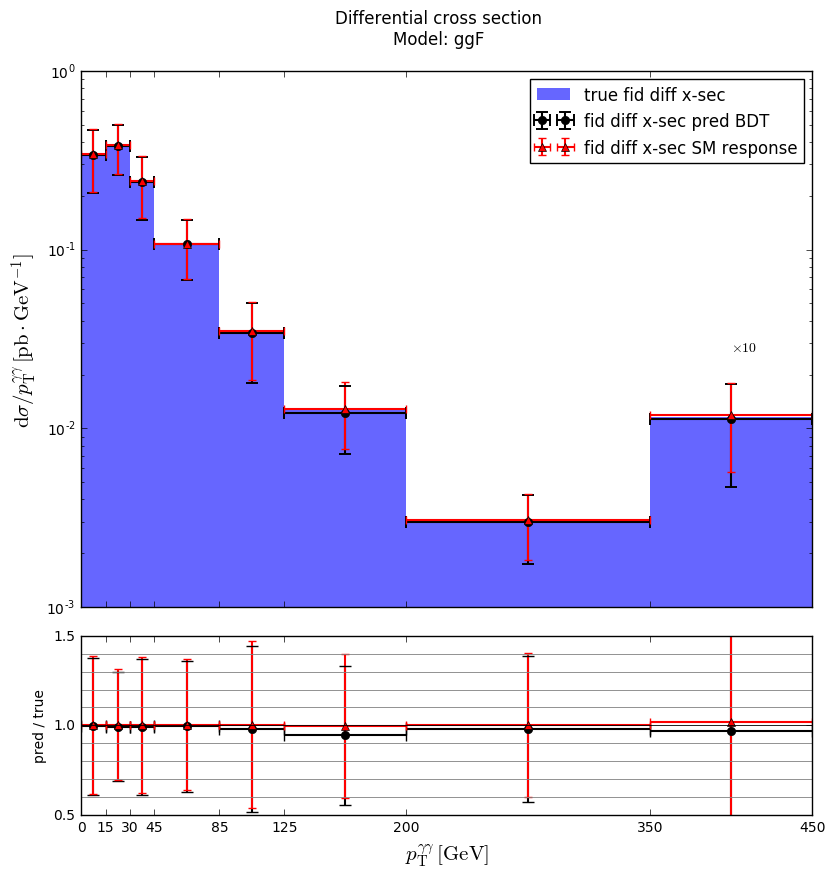

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_ttH.png


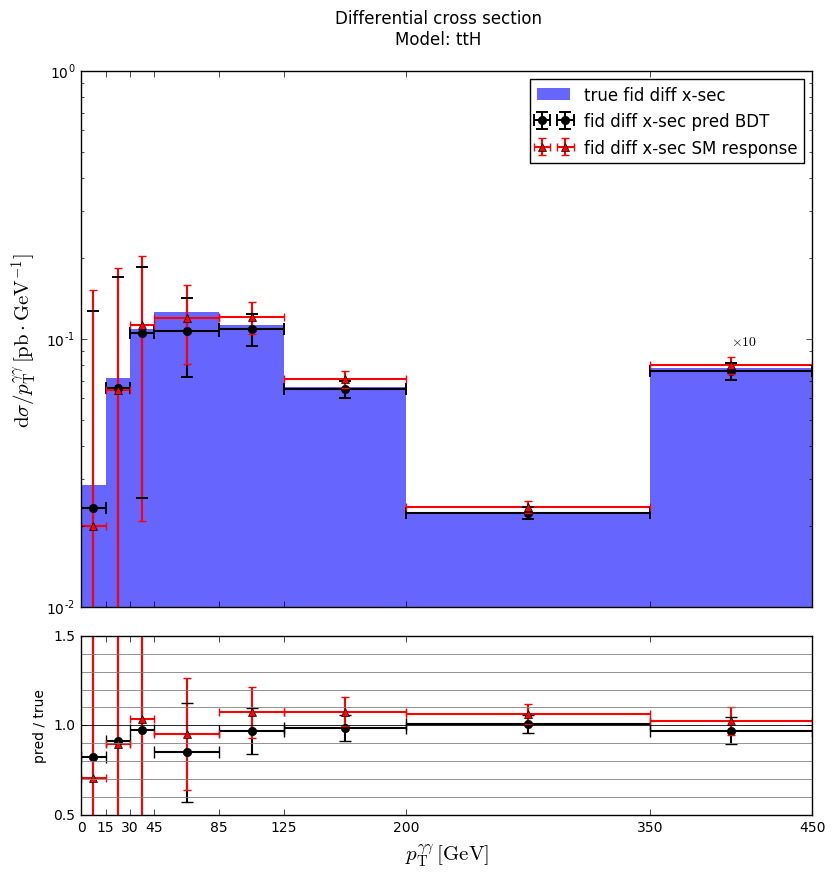

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_VBF.png


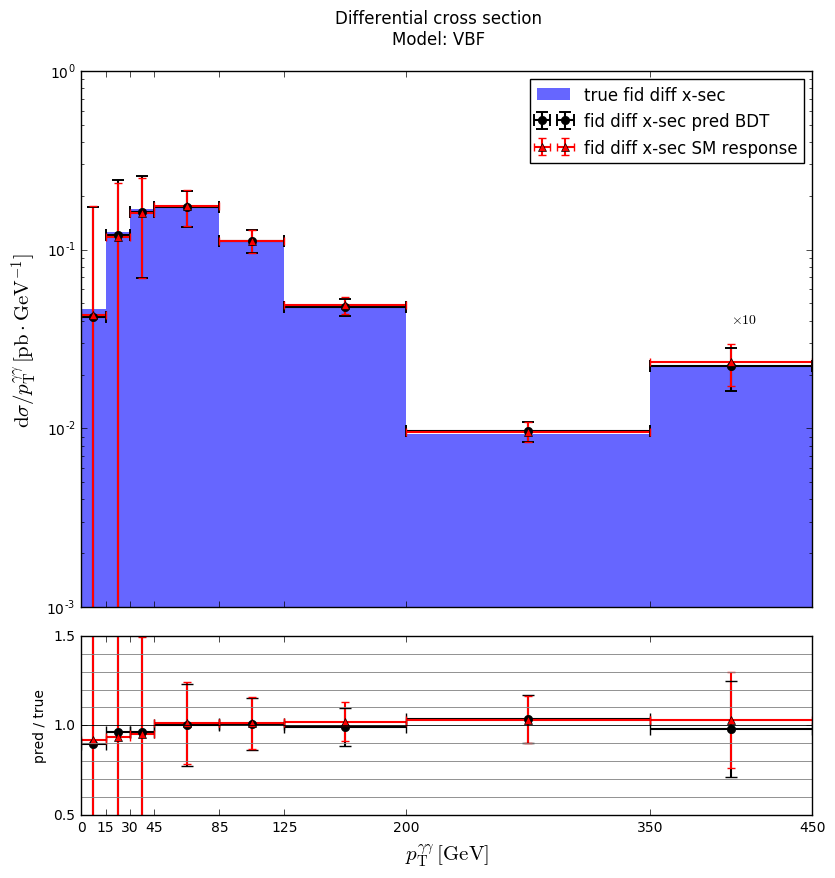

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_VH.png


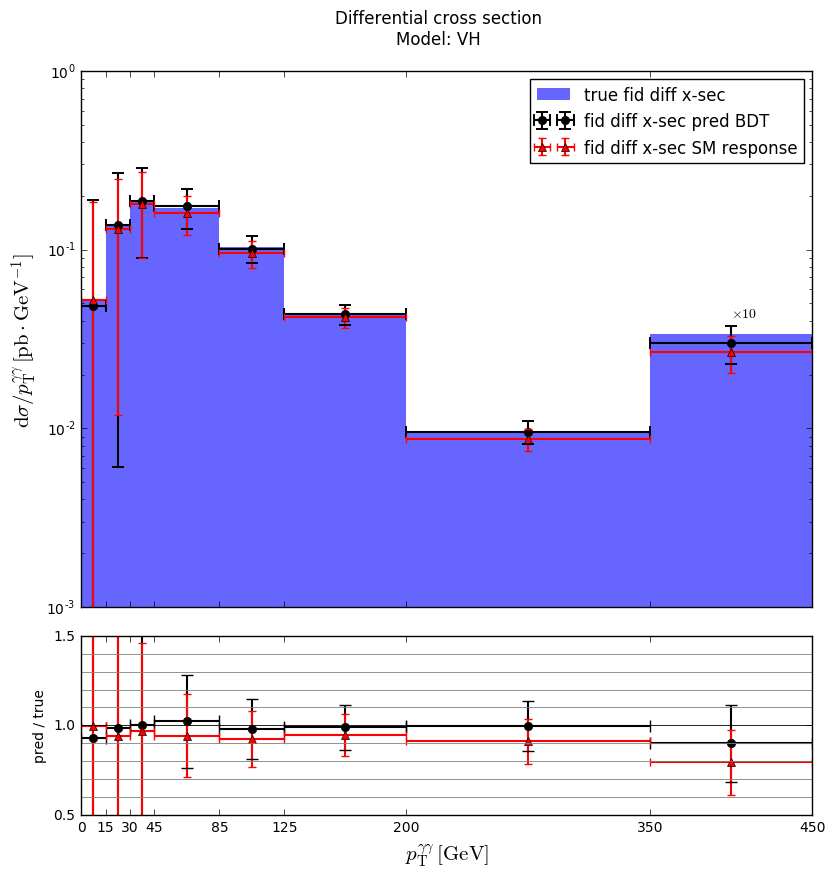

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_SM.png


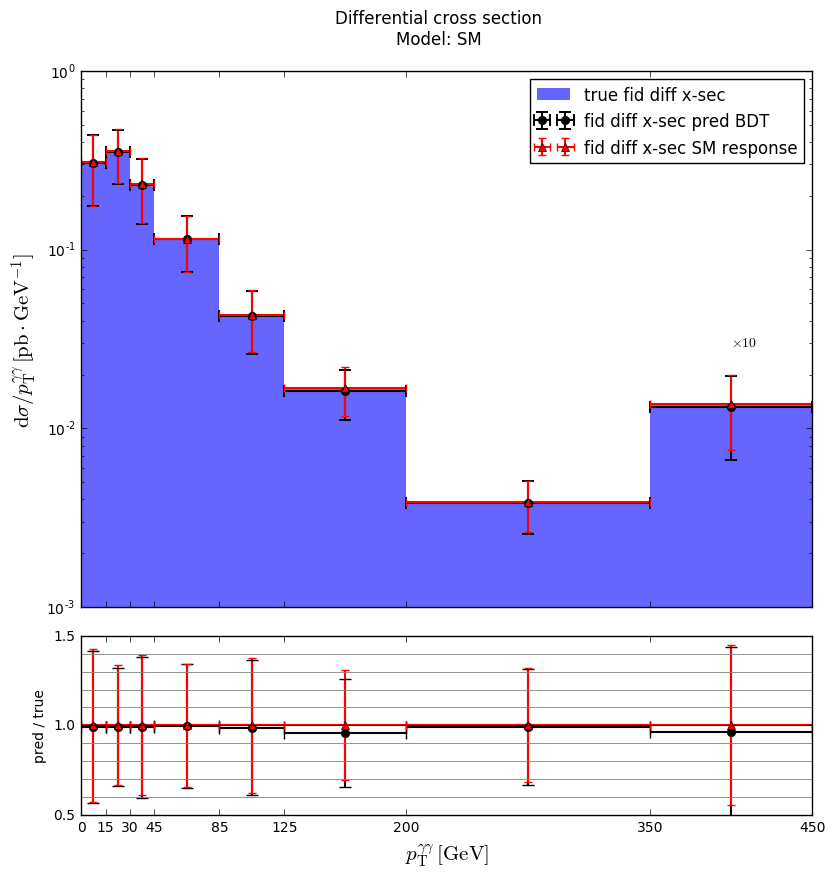

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_BSM1.png


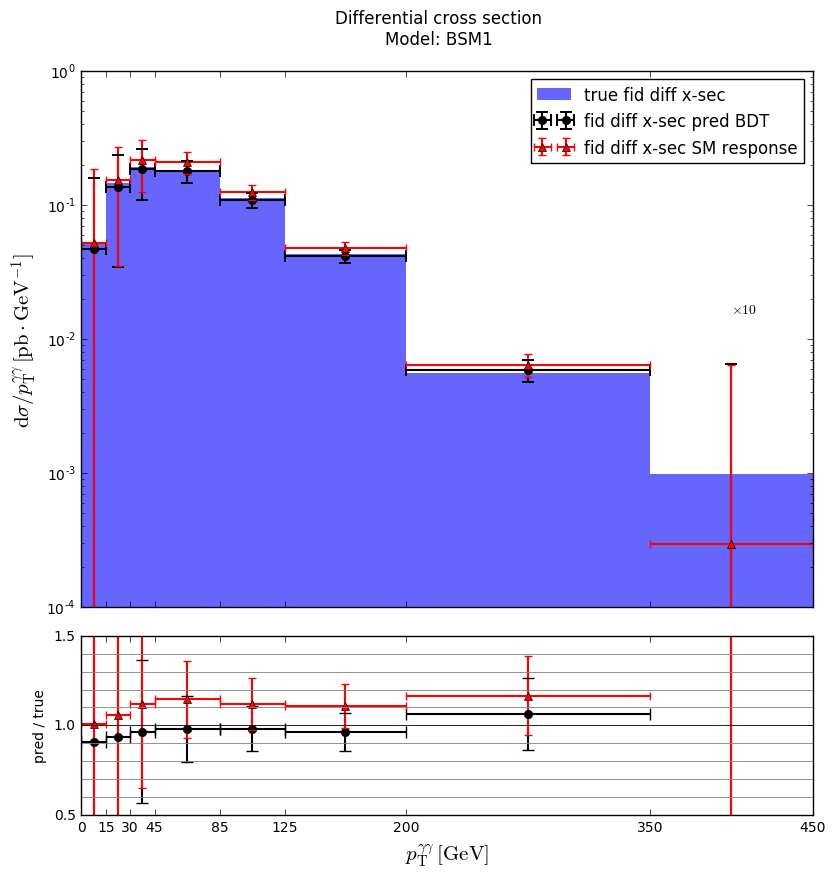

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_BSM2.png


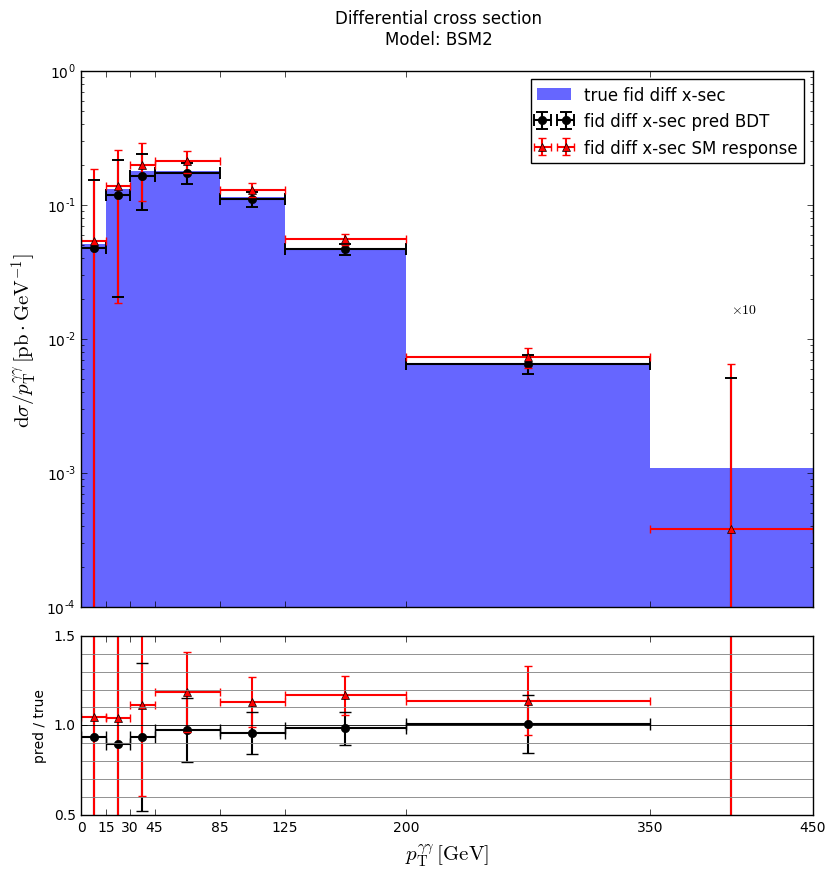

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoPt/xsec_BSM3.png


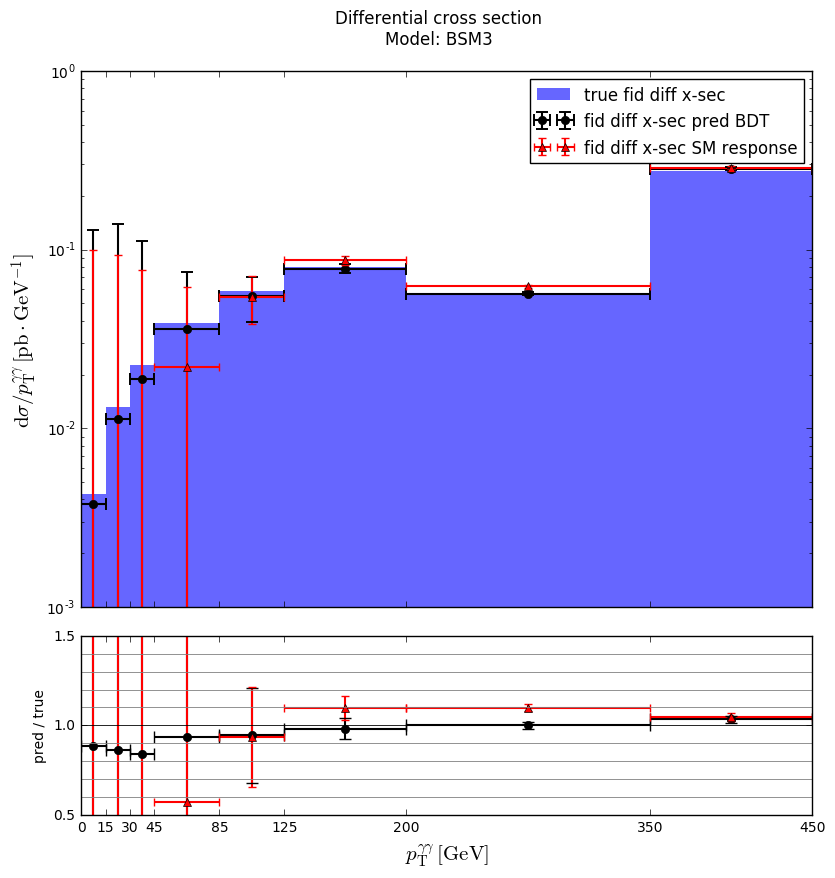

In [3]:
for i in xrange(len(classifier_names)) :
    pl.PlotdifferentialPtXsecSpectrum(ggF_pred[i],profileSMresponse=ggF_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(ttH_pred[i],profileSMresponse=ttH_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(VBF_pred[i],profileSMresponse=VBF_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(VH_pred[i],profileSMresponse=VH_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(SM_pred[i],profileSMresponse=SM_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(BSM1_pred[i],profileSMresponse=BSM1_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(BSM2_pred[i],profileSMresponse=BSM2_SM[i])
    pl.PlotdifferentialPtXsecSpectrum(BSM3_pred[i],profileSMresponse=BSM3_SM[i])
    """
    pl.PlotdifferentialPtXsecSpectrum(VBF_CUETP8M1Down_pred[i],profileSMresponse=VBF_CUETP8M1Down_true[i])
    pl.PlotdifferentialPtXsecSpectrum(VBF_CUETP8M1Up_pred[i],profileSMresponse=VBF_CUETP8M1Up_true[i])
    pl.PlotdifferentialPtXsecSpectrum(VBF_DownPS_pred[i],profileSMresponse=VBF_DownPS_true[i])
    pl.PlotdifferentialPtXsecSpectrum(VBF_UpPS_pred[i],profileSMresponse=VBF_UpPS_true[i])
    pl.PlotdifferentialPtXsecSpectrum(VBF_powheg_pred[i],profileSMresponse=VBF_powheg_true[i])
    
    pl.PlotdifferentialPtXsecSpectrum(ggF_CUETP8M1Down_pred[i],profileSMresponse=ggF_CUETP8M1Down_true[i])
    pl.PlotdifferentialPtXsecSpectrum(ggF_CUETP8M1Up_pred[i],profileSMresponse=ggF_CUETP8M1Up_true[i])
    pl.PlotdifferentialPtXsecSpectrum(ggF_DownPS_pred[i],profileSMresponse=ggF_DownPS_true[i])
    pl.PlotdifferentialPtXsecSpectrum(ggF_UpPS_pred[i],profileSMresponse=ggF_UpPS_true[i])
    pl.PlotdifferentialPtXsecSpectrum(ggF_powheg_pred[i],profileSMresponse=ggF_powheg_true[i])
    """


# Repeat the same for the kinematic observable recoNjets2p5

In [13]:
path = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/differential_recoMatrices/'


labels = ['','std',
        'ggF_CUETP8M1_up',
        'ggF_CUETP8M1_down',
        'ggF_PS_up',
        'ggF_PS_down',
        'ggF_Powheg',
        'VBF_CUETP8M1_up',
        'VBF_CUETP8M1_down',
        'VBF_PS_up',
        'VBF_PS_down',
        'VBF_Powheg',              
]

classifier_names = ['pt20GeVcut',
                    #'3clfs_ggF_CUETP8M1Up',
                    #'3clfs_ggF_CUETP8M1Down',
                    #'3clfs_ggF_UpPS',
                    #'3clfs_ggF_DwonPS',
                    #'3clfs_ggF_powheg',
                    #'3clfs_VBF_CUETP8M1Up',
                    #'3clfs_VBF_CUETP8M1Down',
                    #'3clfs_VBF_UpPS',
                    #'3clfs_VBF_DwonPS',
                    #'3clfs_VBF_powheg',
                    ]
observable = 'recoNjets'


ggF_pred = []
ttH_pred = []
VBF_pred = []
VH_pred = []
SM_pred =[]
BSM1_pred =[]
BSM2_pred =[]
BSM3_pred =[]


ggF_SM = []
ttH_SM = []
VBF_SM = []
VH_SM = []
SM_SM =[]
BSM1_SM =[]
BSM2_SM =[]
BSM3_SM =[]


for classifier_name in  classifier_names :
    
    ggF_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ggF_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ggF',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    ttH_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ttH',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    ttH_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='ttH',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VBF_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VBF_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VBF',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    VH_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VH',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    VH_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='VH',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    SM_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='SM',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    SM_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='SM',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
    BSM1_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM1',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    BSM1_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM1',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    BSM2_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM2',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    BSM2_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM2',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    BSM3_pred.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM3',N_ScaningPoints=10,FastScan=True,whichResponse='pred')
               )
    BSM3_SM.append(lp.LikelihoodProfile(LoadPath=path+classifier_name+'/'+observable+'/',Observable=observable,
                         Model='BSM3',N_ScaningPoints=10,FastScan=True,whichResponse='SM')
               )
    
#%time ttH.DoToyExperiment(N_toys=100)

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_ggF.png


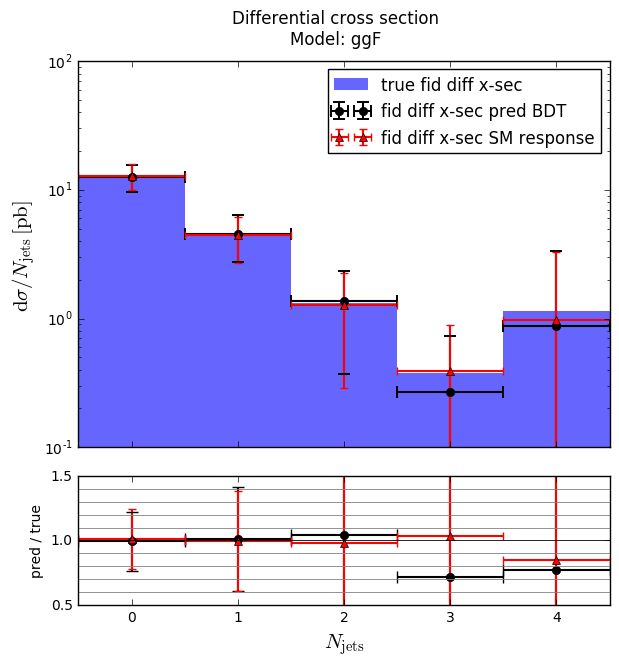

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_ttH.png


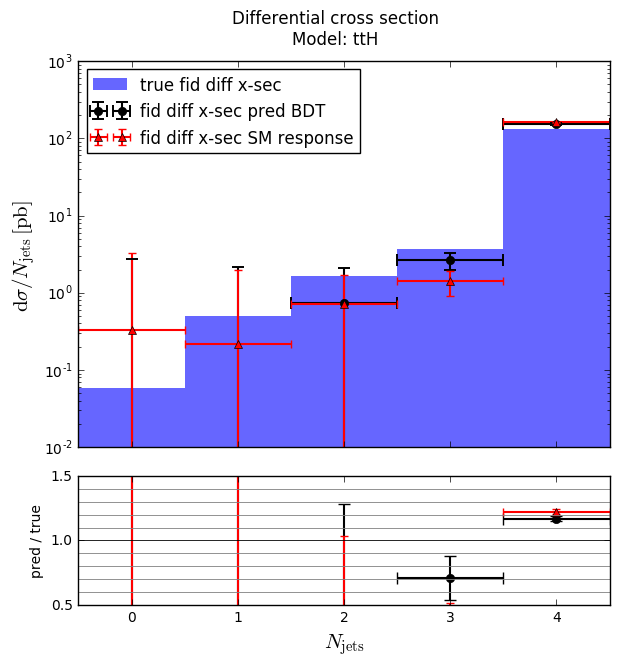

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_VBF.png


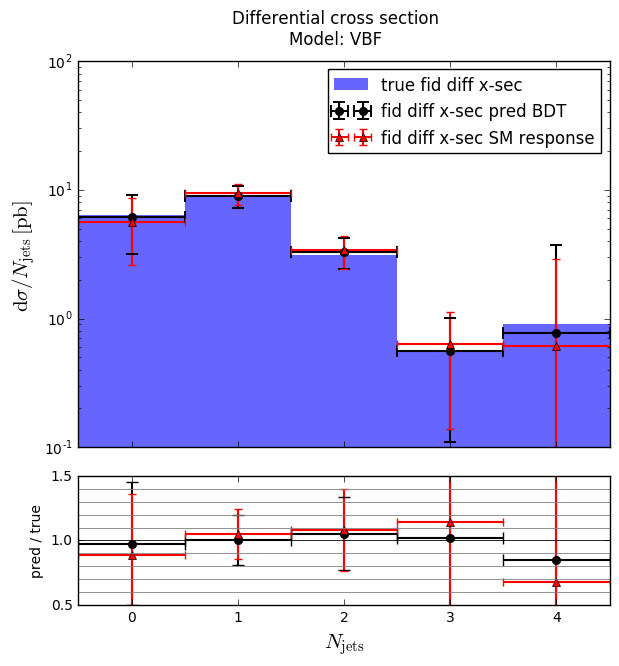

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_VH.png


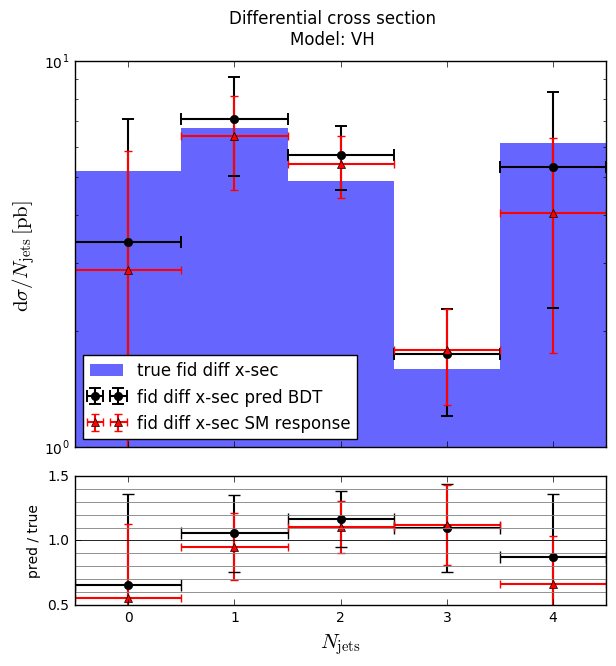

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_SM.png


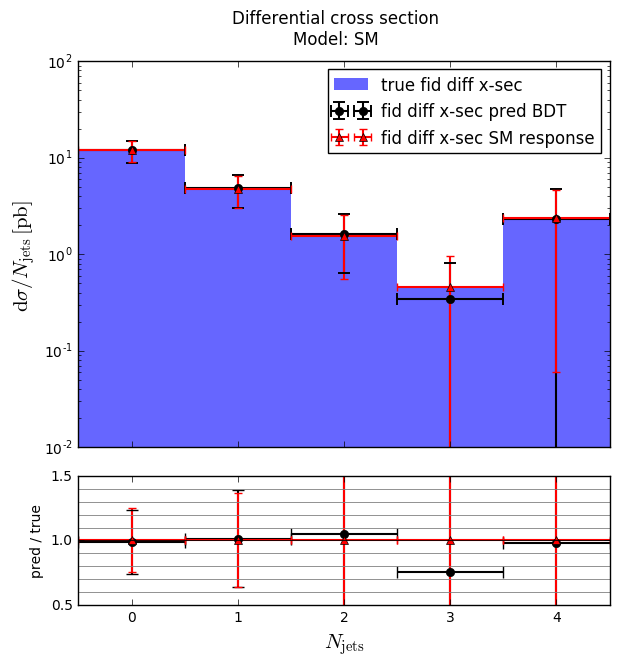

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_BSM1.png


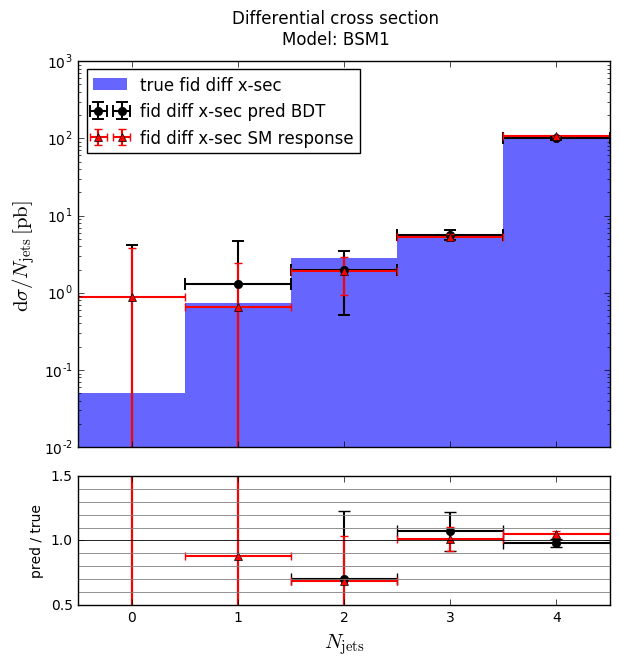

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_BSM2.png


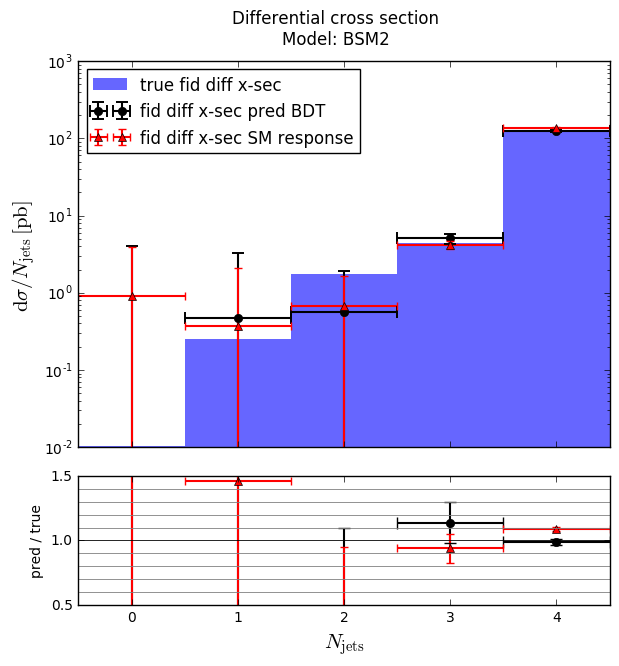

save /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/XsecHist/recoNjets/xsec_BSM3.png


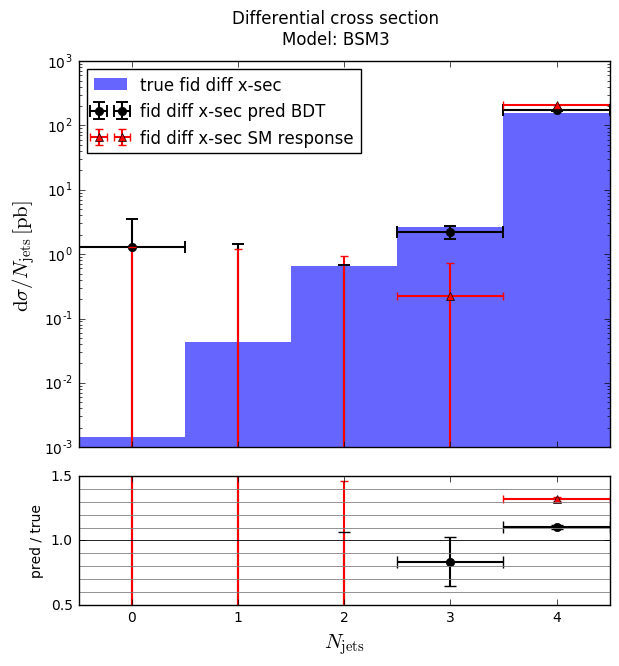

In [14]:
for i in xrange(len(classifier_names)) :
    pl.PlotdifferentialNjetsXsecSpectrum(ggF_pred[i],profileSMresponse=ggF_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(ttH_pred[i],profileSMresponse=ttH_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(VBF_pred[i],profileSMresponse=VBF_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(VH_pred[i],profileSMresponse=VH_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(SM_pred[i],profileSMresponse=SM_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(BSM1_pred[i],profileSMresponse=BSM1_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(BSM2_pred[i],profileSMresponse=BSM2_SM[i])
    pl.PlotdifferentialNjetsXsecSpectrum(BSM3_pred[i],profileSMresponse=BSM3_SM[i])
    


In [16]:
print 'done'

done
